Geração 1: Melhor fitness = 200
Geração 2: Melhor fitness = 190
Geração 3: Melhor fitness = 190
Geração 4: Melhor fitness = 190
Geração 5: Melhor fitness = 190
Geração 6: Melhor fitness = 220
Geração 7: Melhor fitness = 220
Geração 8: Melhor fitness = 190
Geração 9: Melhor fitness = 190
Geração 10: Melhor fitness = 190
Geração 11: Melhor fitness = 190
Geração 12: Melhor fitness = 190
Geração 13: Melhor fitness = 190
Geração 14: Melhor fitness = 150
Geração 15: Melhor fitness = 190
Geração 16: Melhor fitness = 220
Geração 17: Melhor fitness = 220
Geração 18: Melhor fitness = 220
Geração 19: Melhor fitness = 220
Geração 20: Melhor fitness = 220
Geração 21: Melhor fitness = 220
Geração 22: Melhor fitness = 210
Geração 23: Melhor fitness = 210
Geração 24: Melhor fitness = 210
Geração 25: Melhor fitness = 210
Geração 26: Melhor fitness = 210
Geração 27: Melhor fitness = 220
Geração 28: Melhor fitness = 220
Geração 29: Melhor fitness = 220
Geração 30: Melhor fitness = 220


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\mnt\\data\\evolucao_fitness_mochila.png'

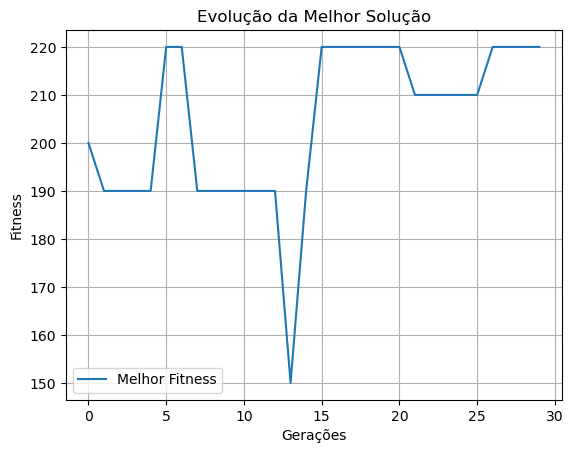

In [21]:
import random
import matplotlib.pyplot as plt

# Parâmetros do problema da mochila
MOCHILA_CAPACIDADE = 50
ITENS = [
    ("item1", 10, 60),
    ("item2", 20, 100),
    ("item3", 30, 120),
    ("item4", 25, 80),
    ("item5", 15, 40),
    ("item6", 5, 20),
    ("item7", 10, 30)
]

# Parâmetros do Algoritmo Genético
TAMANHO_POPULACAO = 10
NUMERO_GERACOES = 30
TAXA_CRUZAMENTO = 0.8
TAXA_MUTACAO = 0.1
ELITISMO = True

# Função de fitness: retorna o benefício total ou penaliza se exceder a capacidade
def fitness(individuo):
    peso_total = sum(ITENS[i][1] for i in range(len(individuo)) if individuo[i] == 1)
    beneficio_total = sum(ITENS[i][2] for i in range(len(individuo)) if individuo[i] == 1)
    
    # Penalizar se o peso total exceder a capacidade da mochila
    if peso_total > MOCHILA_CAPACIDADE:
        return beneficio_total - (peso_total - MOCHILA_CAPACIDADE) * 10
    return beneficio_total

# Inicializar população com indivíduos aleatórios
def inicializa_populacao():
    return [[random.randint(0, 1) for _ in range(len(ITENS))] for _ in range(TAMANHO_POPULACAO)]

# Seleção por torneio
def selecao_torneio(populacao):
    torneio = random.sample(populacao, 3)
    torneio.sort(key=lambda ind: fitness(ind), reverse=True)
    return torneio[0]

# Cruzamento de um ponto
def cruzamento(pai1, pai2):
    if random.random() < TAXA_CRUZAMENTO:
        ponto = random.randint(1, len(pai1) - 1)
        return pai1[:ponto] + pai2[ponto:], pai2[:ponto] + pai1[ponto:]
    return pai1, pai2

# Mutação
def mutacao(individuo):
    for i in range(len(individuo)):
        if random.random() < TAXA_MUTACAO:
            individuo[i] = 1 - individuo[i]
    return individuo

# Evolução da população
def evoluir(populacao):
    nova_populacao = []
    if ELITISMO:
        populacao.sort(key=lambda ind: fitness(ind), reverse=True)
        nova_populacao.append(populacao[0])  # Melhor indivíduo é mantido

    while len(nova_populacao) < TAMANHO_POPULACAO:
        pai1 = selecao_torneio(populacao)
        pai2 = selecao_torneio(populacao)
        filho1, filho2 = cruzamento(pai1, pai2)
        nova_populacao.append(mutacao(filho1))
        if len(nova_populacao) < TAMANHO_POPULACAO:
            nova_populacao.append(mutacao(filho2))

    return nova_populacao

# Algoritmo genético completo
def algoritmo_genetico():
    populacao = inicializa_populacao()
    historico_melhor_fitness = []

    for geracao in range(NUMERO_GERACOES):
        populacao = evoluir(populacao)
        melhor_fitness = max(fitness(individuo) for individuo in populacao)
        historico_melhor_fitness.append(melhor_fitness)
        print(f"Geração {geracao+1}: Melhor fitness = {melhor_fitness}")

    return historico_melhor_fitness

# Executando o algoritmo genético e coletando dados
historico_melhor_fitness = algoritmo_genetico()

# Plotando a evolução da solução (fitness) ao longo das gerações
plt.plot(historico_melhor_fitness, label='Melhor Fitness')
plt.title('Evolução da Melhor Solução')
plt.xlabel('Gerações')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)

# Salvando o gráfico
grafico_path = '/mnt/data/evolucao_fitness_mochila.png'
plt.savefig(grafico_path)

grafico_path